#  Business Problem

Given a  dataset of house prices in the USA. Build a model, to predict the price of a house base on the other variables. The dataset "houses.csv" contains the following variables

- 'Avg. Area Income': Avg. Income of residents of the city house is located in.
- 'Avg. Area House Age': Avg Age of Houses in same city
- 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
- 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
- 'Area Population': Population of city house is located in
- 'Price': Price that the house sold at
- 'Address': Address for the house


The target variable is "Price"; and the predictive variables are: 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms' and 'Area Population'


Your analysis must include:

1. Missing inputation (in case there exists missing values)
2. Exploratory Data Analysis. Show scatterplots, correlation and main statistics of all the variables in the data set
3. Categorical variables binning (dummies) - in case you have categorical variables
4. Split in train and test (25%)
5. Use SQL to get the following statistics: the total number of houses and average of price
6. Fit models to the train dataset. Models to use: linear  regression and random forest
7. Perfomance metrics to compute: MAE and relative MAE



*****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv',decimal='.',sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4997 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [3]:
df1 = df.drop('Address',axis=1)
df1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4997 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


<AxesSubplot:xlabel='Avg. Area Income', ylabel='Count'>

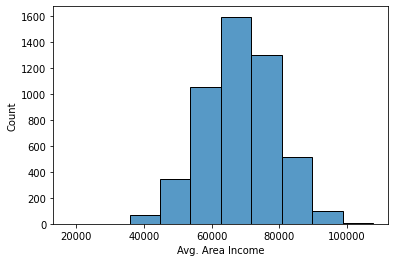

In [5]:
sns.histplot(df1['Avg. Area Income'],bins=10)

In [6]:
df1['Avg. Area Income'].interpolate(method='from_derivatives',inplace=True)

<AxesSubplot:xlabel='Avg. Area Income', ylabel='Count'>

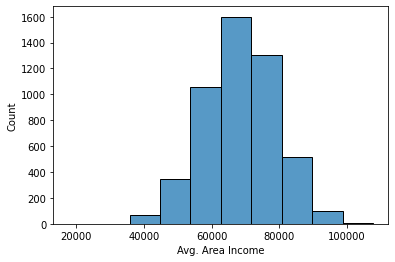

In [7]:
sns.histplot(df1['Avg. Area Income'],bins=10)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [9]:
df1.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68580.207934,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10659.839886,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61477.789288,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68797.671883,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
df1.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002257,-0.011217,0.019653,-0.016432,0.639210
Avg. Area House Age,-0.002257,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011217,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019653,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016432,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639210,0.452543,0.335664,0.171071,0.408556,1.000000


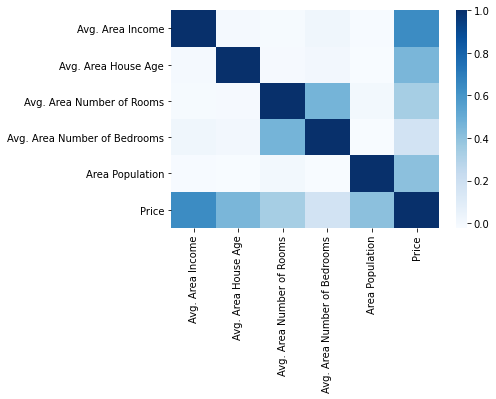

In [11]:
sns.heatmap(df1.corr(),cmap='Blues');

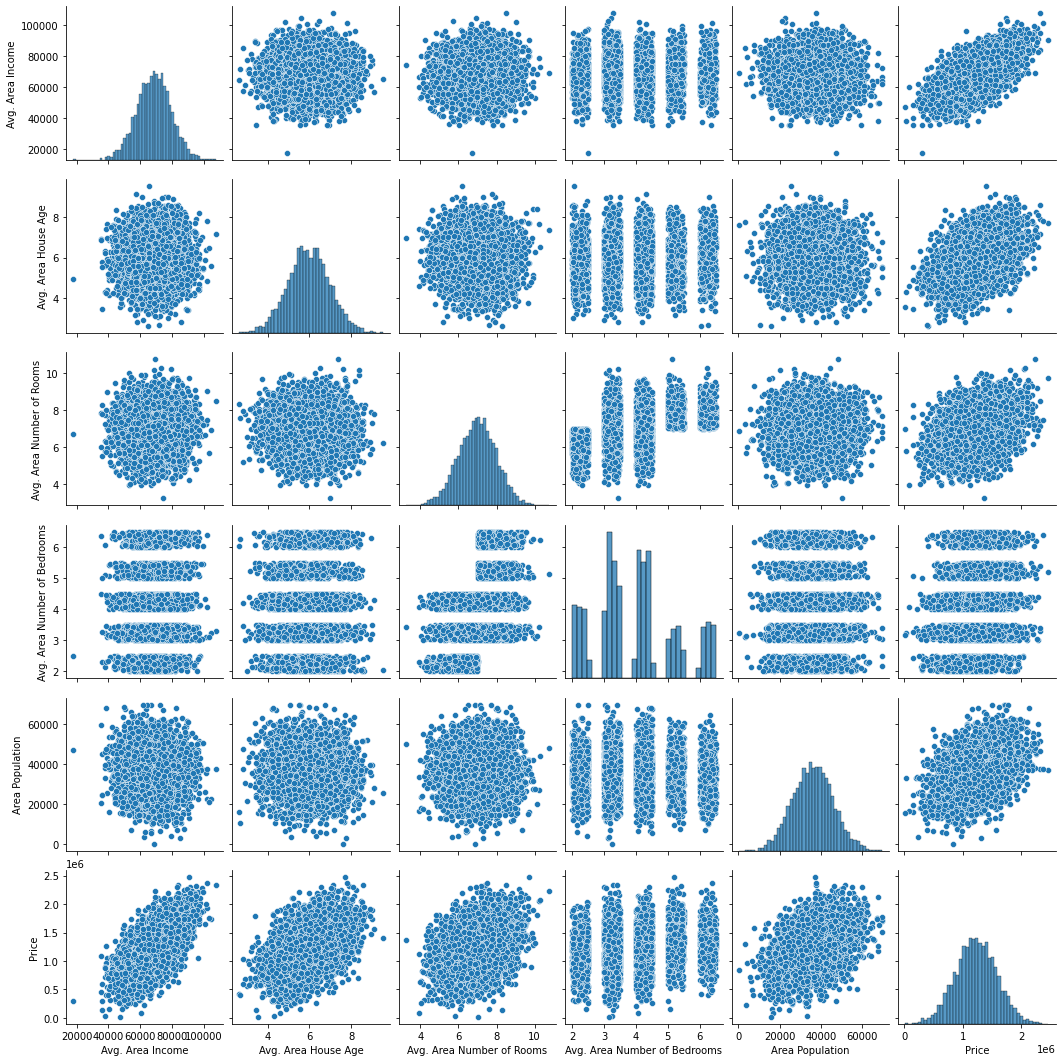

In [12]:
sns.pairplot(df1)

In [13]:
df = df1.copy()

In [14]:
y = df[['Price']]
X = df.drop('Price',axis=1)

y = y.values.ravel()

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [16]:
y_train.shape[0]

3750

In [17]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=10,n_alphas=1000)
lasso.fit(X_train,y_train)

y_pred_lasso = lasso.predict(X_test)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
tuned_parameters = [
    {'min_samples_split':[50,100,500],
     'n_estimators':[10,50,100]}
]

rfcv = GridSearchCV(rf,tuned_parameters)
rfcv.fit(X_train,y_train)
y_pred_rf = rfcv.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MAE_lasso = mean_absolute_error(y_pred = y_pred_lasso,y_true = y_test)
print(" ")
print("------------- LASSO Regression -----------------")
print("MAE: ", MAE_lasso)
print("Relative MAE (LASSO): ", 100*round(MAE_lasso/y_test.mean(),2) )
print("R2 (LASSO): ", r2_score(y_pred = y_pred_lasso, y_true = y_test) )

 
------------- LASSO Regression -----------------
MAE:  187035.0120928142
Relative MAE (LASSO):  15.0
R2 (LASSO):  0.5933161247614287


In [20]:
MAE_rf = mean_absolute_error(y_pred = y_pred_rf,y_true = y_test)
print(" ")
print("------------- RANDOM FOREST CV -----------------")
print("MAE: ", MAE_rf)
print("Relative MAE (Random Forest): ", 100*round(MAE_rf/y_test.mean(),2) )
print("R2 (Random Forest): ", r2_score(y_pred = y_pred_rf, y_true = y_test) )

 
------------- RANDOM FOREST CV -----------------
MAE:  108702.6326028153
Relative MAE (Random Forest):  9.0
R2 (Random Forest):  0.8564556131267566
